In [1]:
# %matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
# import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib widget
plt.style.use('RasmusStyle.mplstyle')

from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

from datetime import date

import sys
sys.path.insert(1,'../scripts/') # Add path to scripts, to allow importing PandemiXFunctions
import PandemiXFunctions as pf


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# # Define running mean functions
# def rnMean(data,meanWidth):
#     return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
# def rnTime(t,meanWidth):
#     return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [3]:
df2020 = pd.read_csv('../InternationalData/Stringency/OxCGRT_nat_differentiated_withnotes_2020.csv')
df2021 = pd.read_csv('../InternationalData/Stringency/OxCGRT_nat_differentiated_withnotes_2021.csv')
df2022 = pd.read_csv('../InternationalData/Stringency/OxCGRT_nat_differentiated_withnotes_2022.csv')

C:\Users\rakrpe\AppData\Local\Temp\ipykernel_21444\3900875163.py:1: DtypeWarning: Columns (121,122,130) have mixed types. Specify dtype option on import or set low_memory=False.
  df2020 = pd.read_csv('../InternationalData/Stringency/OxCGRT_nat_differentiated_withnotes_2020.csv')
C:\Users\rakrpe\AppData\Local\Temp\ipykernel_21444\3900875163.py:2: DtypeWarning: Columns (130) have mixed types. Specify dtype option on import or set low_memory=False.
  df2021 = pd.read_csv('../InternationalData/Stringency/OxCGRT_nat_differentiated_withnotes_2021.csv')
C:\Users\rakrpe\AppData\Local\Temp\ipykernel_21444\3900875163.py:3: DtypeWarning: Columns (116,121,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df2022 = pd.read_csv('../InternationalData/Stringency/OxCGRT_nat_differentiated_withnotes_2022.csv')


In [21]:
df2020

dfDK20 = df2020[df2020.CountryName == 'Denmark']
dfSE20 = df2020[df2020.CountryName == 'Sweden']
dfDK21 = df2021[df2021.CountryName == 'Denmark']
dfSE21 = df2021[df2021.CountryName == 'Sweden']
dfDK22 = df2022[df2022.CountryName == 'Denmark']
dfSE22 = df2022[df2022.CountryName == 'Sweden']
# dfDK20
# dfSE20


dfDK = pd.concat([dfDK20,dfDK21,dfDK22])
dfSE = pd.concat([dfSE20,dfSE21,dfSE22])


In [29]:
dfDK21.columns

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1E_School closing', 'C1E_Flag',
       'C1NV_School closing', 'C1NV_Flag',
       ...
       'ContainmentHealthIndex_NonVaccinated',
       'ContainmentHealthIndex_NonVaccinated_ForDisplay',
       'ContainmentHealthIndex_Vaccinated',
       'ContainmentHealthIndex_Vaccinated_ForDisplay',
       'ContainmentHealthIndex_SimpleAverage',
       'ContainmentHealthIndex_SimpleAverage_ForDisplay',
       'ContainmentHealthIndex_WeightedAverage',
       'ContainmentHealthIndex_WeightedAverage_ForDisplay',
       'EconomicSupportIndex', 'EconomicSupportIndex_ForDisplay'],
      dtype='object', length=160)

In [43]:
# for c in dfDK21.columns:
#     print(c)

dfDK21['C1_Notes'].unique()
# dfDK22['C1_Notes'].unique()
dfSE21['C1_Notes'].unique()

array([nan,
       '"The temporary regulations give principals a certain flexibility to make decisions about their activities based on the current infection control situation or local needs. There are opportunities for the principal to take action if the school is open or if the school is or has been closed.  The Swedish Public Health Agency has previously recommended that upper secondary schools partially close and switch to distance education from Monday 7 December 2020 until Wednesday 6 January 2021. The Swedish Public Health Agency has now decided that this recommendation will be extended and apply until 24 January 2021."  Note: Since principals have the authority to decide whether to close high-schools, depending on the regional situation, and this is only a recommendation - making it unlikely for upper-secondary schools to close countrywide - a Targeted flag has been selected.  Source: https://web.archive.org/web/20201221201801/https://www.skolverket.se/regler-och-ansvar/coronavi

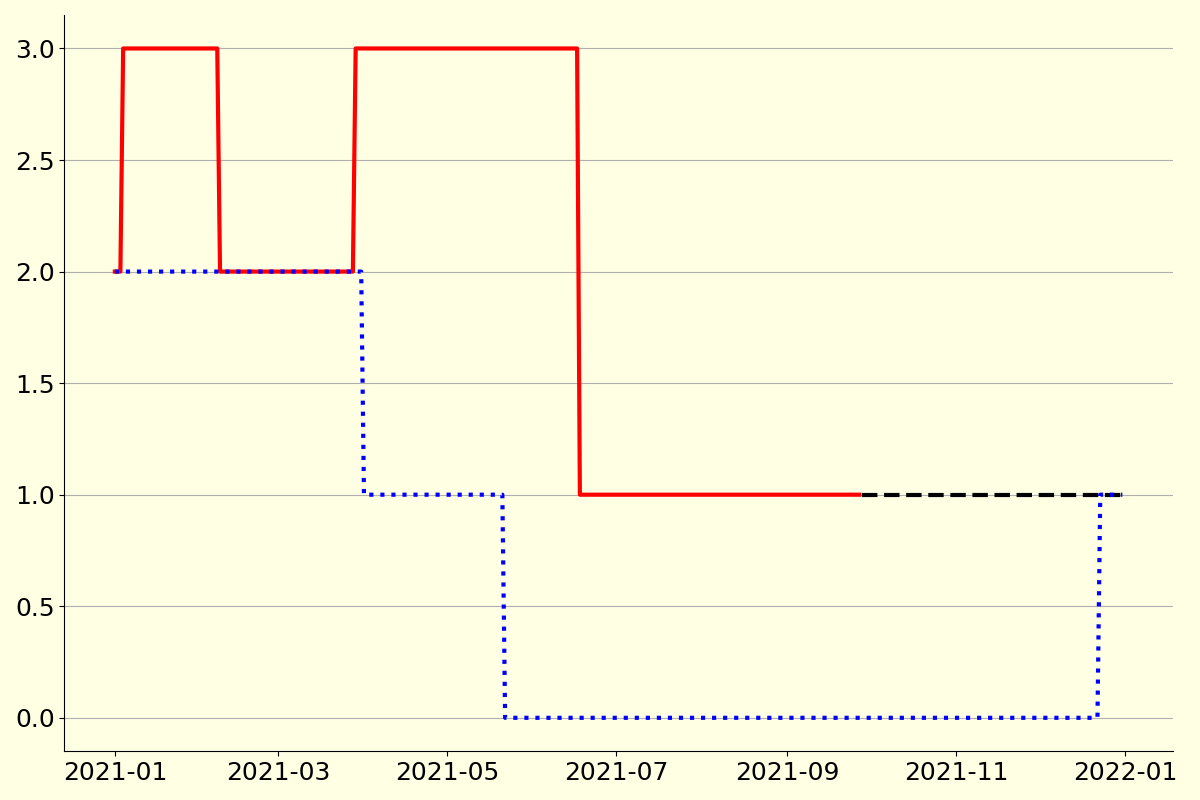

In [31]:
datesDK = pd.to_datetime(dfDK21['Date'],format='%Y%m%d')
datesSE = pd.to_datetime(dfSE21['Date'],format='%Y%m%d')

fig,ax = plt.subplots()

ax.plot(datesDK,dfDK21['C1E_School closing'],'r')
ax.plot(datesDK,dfDK21['C1NV_School closing'],'k--')
ax.plot(datesSE,dfSE21['C1E_School closing'],'b:')
# dfDK20

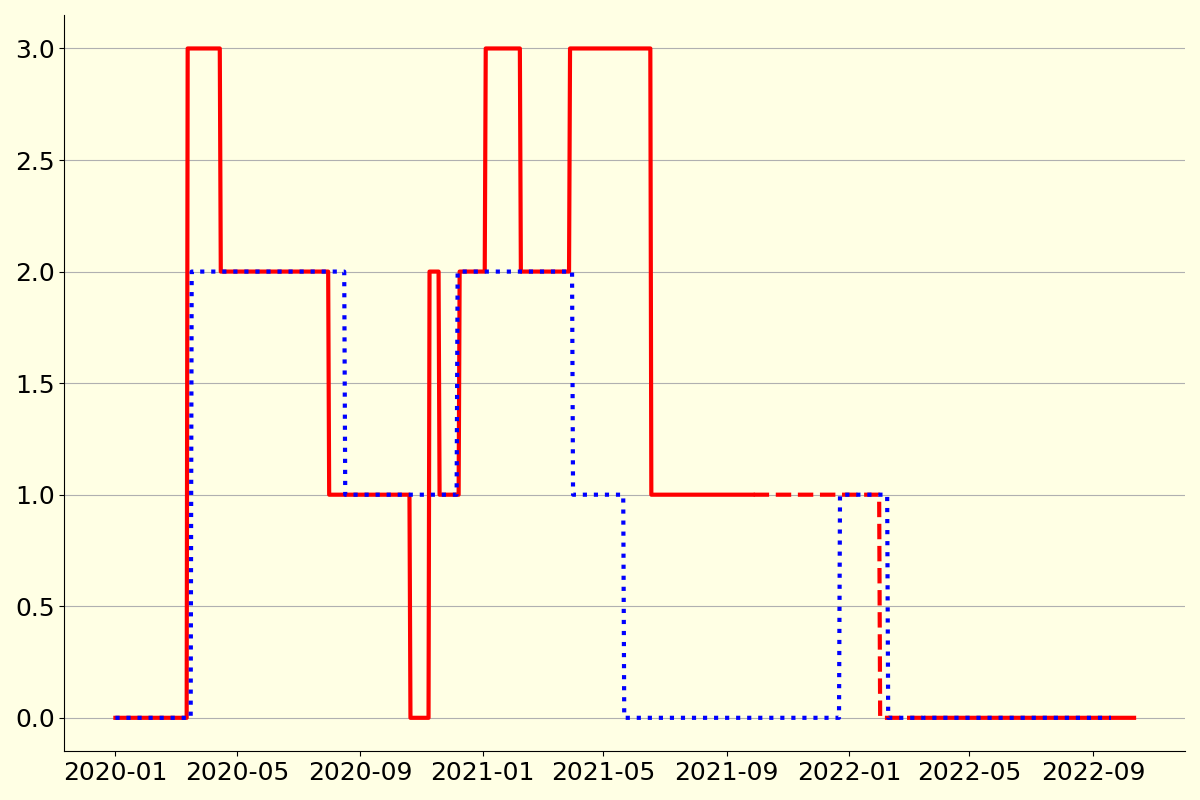

In [33]:
datesDK = pd.to_datetime(dfDK['Date'],format='%Y%m%d')
datesSE = pd.to_datetime(dfSE['Date'],format='%Y%m%d')

fig,ax = plt.subplots()

ax.plot(datesDK,dfDK['C1E_School closing'],'r')
ax.plot(datesDK,dfDK['C1NV_School closing'],'r--')
ax.plot(datesSE,dfSE['C1E_School closing'],'b:')
# dfDK20